In [3]:
# These are the libraries will be used for this lab.
# Import the library PyTorch

import torch
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()
       
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
  
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.

In [4]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

Let us plot the line.

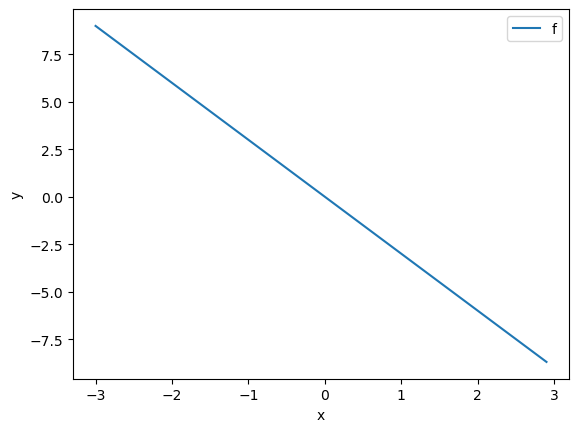

In [5]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use torch.randn(X.size()) to generate Gaussian noise that is the same size as X and has a standard deviation opf 0.1.

In [6]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

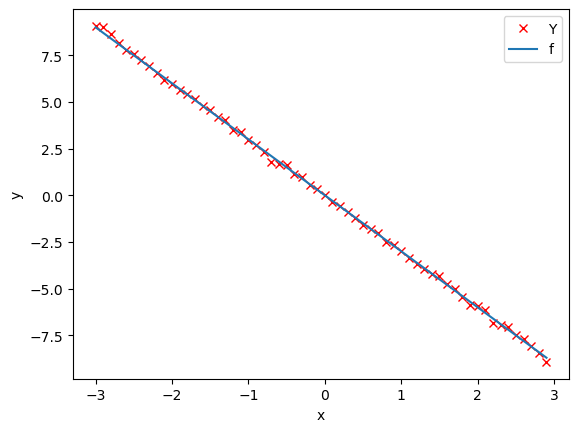

In [7]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Create the Model and Cost Function (Total Loss)

In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.

In [8]:
# Create forward function for prediction

def forward(x):
    return w * x

In [9]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [10]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument requires_grad to  True because the system must learn it.

In [11]:
w = torch.tensor(-10.0, requires_grad = True)

In [15]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<class 'numpy.ndarray'>


## Train the Model

In [13]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

Let us try to run 4 iterations of gradient descent:

C:\Users\Ordinateur\AppData\Local\Temp\ipykernel_44200\3839385611.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


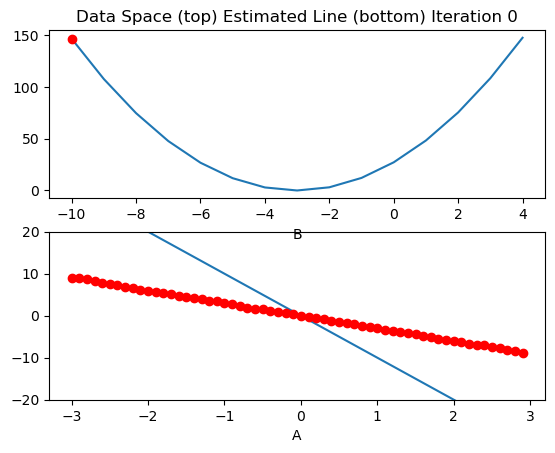

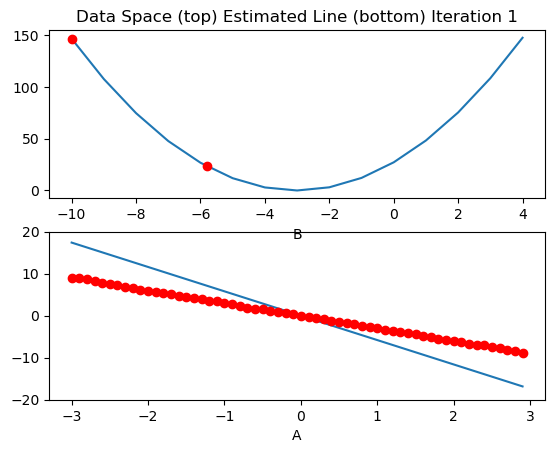

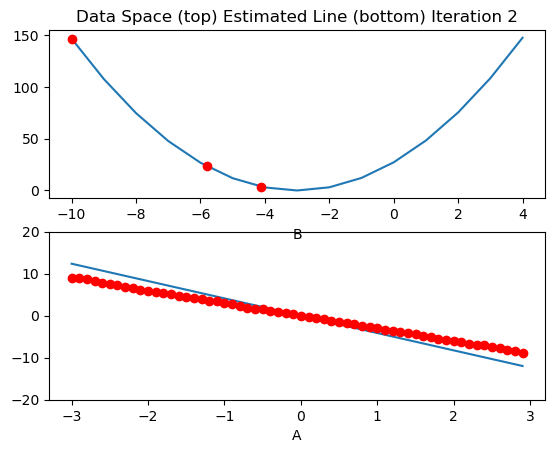

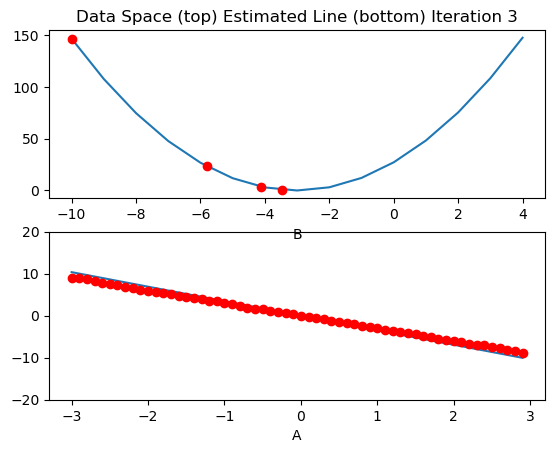

<Figure size 640x480 with 0 Axes>

In [16]:
# Give 4 iterations for training the model here.

train_model(4)

Text(38.097222222222214, 0.5, 'Cost')

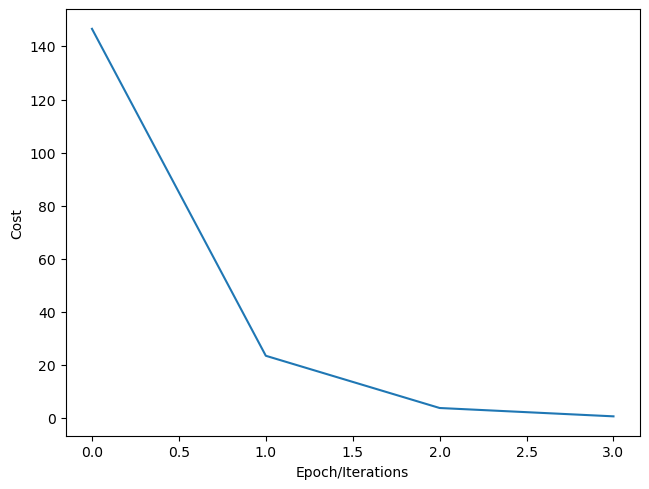

In [17]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")